## Modelowanie wartości nieruchomości na podstawie cen nieruchomości ze zbioru House Sales in King County.

Opis zmiennych:
* id budynku 
* date - data transakcji 
* price - cena 
* bedrooms - liczba sypialni 
* bathrooms - liczba łazienek 
* sqft_living - powierzchnia przestrzeni mieszkalnej 
* sqft_lot - powierzchnia korytarzy 
* floors - piętra 
* waterfront - czy jest widok na nabrzeże? 
* view - czy był oglądany przez klientów? 
* condition - jak dobre są ogólne warunki 
* indeks grade - ocena na podstawie King County grading system 
* sqft_above - powierzchnia dachu 
* sqft_basement - powierzchnia piwnicy
* yr_built - rok budowy 
* yr_renovated - rok renowacji 
* zipcode - kod pocztowy 
* lat - długość geograficzna 
* long - szerokość geograficzna 
* sqft_living15 - powierzchnia mieszkalna w 2015 r. 
* sqft_lot15 - powierzchnia korytarzy w 2015 r.

In [1]:
# Wczytanie paczek.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # do korelacji Pearsona
from sklearn.model_selection import train_test_split # do dzielenia na zbiór treningowy i testowy
from sklearn.preprocessing import StandardScaler # do standaryzowania danych
from sklearn.neighbors import KNeighborsRegressor # do utworzenia regresora
from sklearn.grid_search import RandomizedSearchCV # do random search
from sklearn.metrics import mean_absolute_error # do obliczenia średniego błędu bezwzględnego
from sklearn.metrics import r2_score # do obliczenia r2

%matplotlib inline

C:\Users\Anna\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Anna\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
data=pd.read_csv('C:/Users/Anna/Desktop/DataScientist-zad/Wirtualna Polska/kc_house_data.csv', sep=",")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Usunięcie kolumn id i date.
data.drop(['id', 'date'], axis=1, inplace=True)

In [4]:
# Sprawdzenie ile jest braków danych.
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
# Wypisanie statystyk.
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


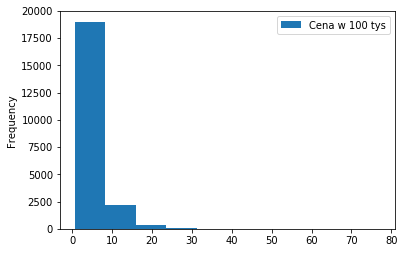

In [6]:
# Rozkład cen domów.
plt.figure(figsize=(7,7))

pr=[]
for i in range(0,21613):
    pr.append(round(data.price[i]/100000,2)) # zmiana skali na osi x

pr_plot=pd.DataFrame(pr, columns=['Cena w 100 tys'])
pr_plot.plot.hist()

Rozkład cen domów charakteryzuje się asymetrią prawostrinną. Konieczne będzie wystandaryzowanie zmiennych.

In [7]:
# Usunięcie obserwacji odstających. Na mocy zasady 3 sigm wszystkie obserwacje powinny się 
# znajdować na granicy 3 odchyleń standardowych.
data = data[np.abs(data['price']-data['price'].mean())<=(3*data['price'].std())] 

In [8]:
data.shape

(21207, 19)

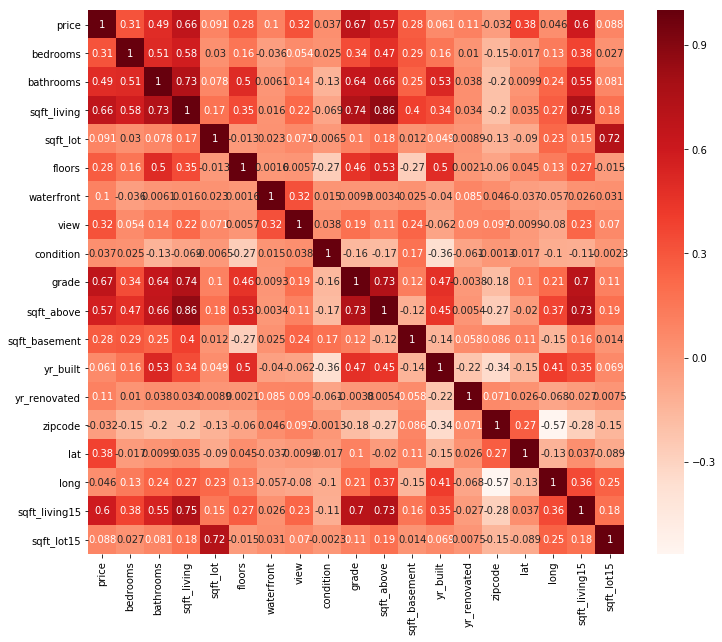

In [9]:
# Korelacja Pearsona
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
# Dla korelacji Pearsona wartości są z zakresu od -1 do 1. Przy korelacji bliskiej 1, zmienne wykazują dodatni związek. 
# Wartości bliskie -1 charakteryzują się ujemną korelacją, a bliskie 0 słabą korelacją (0 oznacza jej brak).

Poniżej wypisane są zmienne, które wykazują najwyższą korelację ze zmienną zależną price. Są to najlepsi kandydaci do modelu. Autorka intuicyjnie sprawdziła korelacje między: kodem pocztowym a współrzędnymi geograficznymi, powierzchnią przestrzeni mieszkalnej a powierzchnią przestrzeni mieszkalnej w 2015 roku, powierzchnią korytarzy a powierzchnią korytarzy w 2015 roku. Ostatecznie zostały usunięte: kod pocztowy, powierzchnia mieszkalna i powierzchnia korytarzy.

In [10]:
# Korelacja z zienną zależną. 
cor_target = abs(cor['price'])
relevant_features = cor_target[cor_target>0.5]
relevant_features

price            1.000000
sqft_living      0.664942
grade            0.672070
sqft_above       0.567139
sqft_living15    0.595249
Name: price, dtype: float64

In [11]:
# Korelacja kodu pocztowego z współrzędnymi geograficznymi.
print(data[['zipcode', 'lat']].corr())
print(data[['zipcode', 'long']].corr())

          zipcode       lat
zipcode  1.000000  0.271627
lat      0.271627  1.000000
          zipcode      long
zipcode  1.000000 -0.565131
long    -0.565131  1.000000


In [12]:
data.drop(['zipcode'],axis=1, inplace=True) 

In [13]:
print(data[['sqft_living', 'sqft_living15']].corr())
print(data[['sqft_lot', 'sqft_lot15']].corr())

               sqft_living  sqft_living15
sqft_living       1.000000       0.751807
sqft_living15     0.751807       1.000000
            sqft_lot  sqft_lot15
sqft_lot    1.000000    0.719538
sqft_lot15  0.719538    1.000000


In [14]:
data.drop(['sqft_lot','sqft_living'],axis=1, inplace=True) 

Do rozwiązania problemu regresji autorka postanowiła wykorzystać algorytm k-najbliższych sąsiadów. Algorytm opera się na założeniu, że nieznana wartość zmiennej może zostać przewidziana poprzez dopasowanie do obserwacji nabardziej podobnych (jego najbliższych sąsiadów) i o znanych wartościach. Metoda jest mało wymagająca jeśli chodzi o ilość parametrów. Konieczne jest podanie k, które oznacza liczbę najlbiższych sąsiadów. Ważną kwestią jest dobór metryki do obliczenia nowej wartości zmiennej w oparciu o odległość od punktów na zbiorze treningowym. Autorka rozpatrzyła takie metryki jak: Euklidesowa, Manhattan, Chebysheva, Minkowskiego. Ponadto wymagana jest normalizacja danych, która zabezpiecza przed błędnym znalezieniem bliskich sąsiadów (problem z przekleństwem wymiarowości). Zarówno wybór k jak i właściwej metryki dokonał się z pomocą algorytmu random search, który pozwolił na losowy dobór hiperparametrów przy jednczesnej maksymalizacji scora ($ R^2 $ liczebościowego).


In [15]:
# Dzielę zbiór na treningowy i testowy w proporcji 70% i 30%. Zmienną zależną jest price.
train , test = train_test_split(data, test_size = 0.3)

x_train = train.drop('price', axis=1)
y_train = train['price']

x_test = test.drop('price', axis = 1)
y_test = test['price']

In [16]:
# Skalowanie wartości.
sc = StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled=sc.transform (x_test)
x_test = pd.DataFrame(x_test_scaled)

In [17]:
# Utworzenie regresora.
knn= KNeighborsRegressor()

n_neighbors = list(range(1, 21))
weights = ['uniform','distance']
metric = ['euclidean','manhattan','chebyshev','minkowski'] 
param_dist = {
    'n_neighbors': n_neighbors,
    'weights': weights,
    'metric': metric,
}

rand = RandomizedSearchCV(knn, param_dist, cv=10, n_iter=10, random_state=5)
# Objaśnienia: random_state - gwarantuje powtarzalność wyników, n_iter - liczba losowych kombinacji
# cv oznacza ile razy chcę podzielić dane

# Fit.
rand.fit(x_train, y_train)

# Scory.
rand.grid_scores_

[mean: 0.77983, std: 0.01379, params: {'weights': 'uniform', 'n_neighbors': 14, 'metric': 'euclidean'},
 mean: 0.72569, std: 0.01715, params: {'weights': 'uniform', 'n_neighbors': 5, 'metric': 'chebyshev'},
 mean: 0.79136, std: 0.01434, params: {'weights': 'uniform', 'n_neighbors': 17, 'metric': 'manhattan'},
 mean: 0.77757, std: 0.01478, params: {'weights': 'uniform', 'n_neighbors': 18, 'metric': 'minkowski'},
 mean: 0.78223, std: 0.01525, params: {'weights': 'distance', 'n_neighbors': 20, 'metric': 'minkowski'},
 mean: 0.79152, std: 0.01634, params: {'weights': 'uniform', 'n_neighbors': 8, 'metric': 'manhattan'},
 mean: 0.78411, std: 0.01385, params: {'weights': 'distance', 'n_neighbors': 11, 'metric': 'euclidean'},
 mean: 0.78253, std: 0.01525, params: {'weights': 'distance', 'n_neighbors': 19, 'metric': 'minkowski'},
 mean: 0.64287, std: 0.03750, params: {'weights': 'distance', 'n_neighbors': 1, 'metric': 'euclidean'},
 mean: 0.78420, std: 0.01452, params: {'weights': 'distance', '

In [18]:
# Wypisanie średnich.
mean_scores = [result.mean_validation_score for result in rand.grid_scores_]
# Wypisanie parametru k.
k_param=[rand.grid_scores_[i].parameters['n_neighbors'] for i in range(10)]
    
val=[]
k=[]
for i in range(0,10):
    val.append(mean_scores[i])
    k.append(k_param[i]) 

In [19]:
# Utworzyłam DF dla k i średniej, które potem połączyłam i posortowałam po k. Na końcu usunęłam kolumnę i utworzyłam
# index z wartościami parametru k.
df1=pd.DataFrame(k, columns=['Wartość parametru k'])
df2=pd.DataFrame(val, columns=['średnia'])
df_all=pd.concat([df1, df2], axis=1)
df_all.sort_values(by='Wartość parametru k', inplace=True)
df_all.index=df_all['Wartość parametru k']

del df_all['Wartość parametru k']

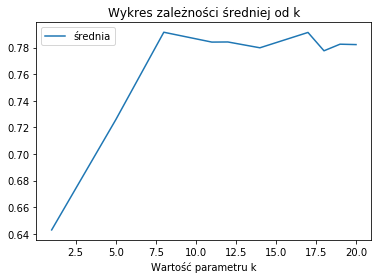

In [20]:
df_all.plot(legend=True, title='Wykres zależności średniej od k')

In [21]:
print('Najlepszy score wynosi: %f' % rand.best_score_)
print(" ")
print("Najlepsze parametry według algorytmu random search to:")
print(rand.best_params_)
print(" ")
print("Najlepszy estymator według algorytmu random search to:")
print(rand.best_estimator_)

Najlepszy score wynosi: 0.791517
 
Najlepsze parametry według algorytmu random search to:
{'weights': 'uniform', 'n_neighbors': 8, 'metric': 'manhattan'}
 
Najlepszy estymator według algorytmu random search to:
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
          metric_params=None, n_jobs=1, n_neighbors=8, p=2,
          weights='uniform')


In [22]:
# Predycja cen domów.
model=rand.best_estimator_
y_pred = model.predict(x_test)

Do mierzenia wydajności modelu autorka postanowiła obliczyć średni błąd bezwzględny (MAE), który definiuje się jako średnia błędów bezwzględnych. Oczekiwana jest jak najmniejsza wartość błędu. W przypadku ceny domów wykorzystanie tej statystyki okazuje się być sensowne z logicznego punktu widzenia. Interpretując MAE można stwierdzić, że rzeczony model myli się średnio o 75881$. 

In [23]:
# Średni błąd bezwzględny.
round(mean_absolute_error(y_test, y_pred))

75881.0

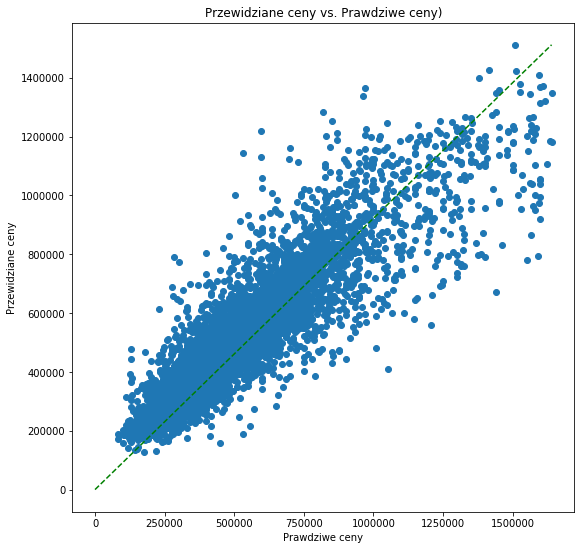

In [24]:
# Porównanie cen rzeczywistych z cenami przewidzianymi przez model. Widać dodatnią korelację między danymi. 
plt.figure(figsize=(9,9))
plt.scatter(y_test, y_pred)
plt.plot([0, y_test.max()], [0, y_pred.max()], "g--")
plt.xlabel("Prawdziwe ceny")
plt.ylabel("Przewidziane ceny")
plt.title('Przewidziane ceny vs. Prawdziwe ceny)')
plt.show()

Autorka postanowiła sprawdzić jak działa model. W tym celu wprowadziła losowe dane ze zbioru i wykorzystując zbudowany model wykonała predykcję. Dla losowej obserwacji model zaniżał cenę domu o wartość przybliżoną do średniego błędu bezwzględnego.

In [25]:
new_prediction=model.predict(sc.transform(np.array([[3, 2, 1, 0, 0, 3, 8, 1680, 0, 1987, 0, 47.6168,-122.045, 1800, 7503]])))
new_prediction

array([428625.])

In [26]:
# Cena rzeczywista domu to: 510000
print("Różnica między ceną rzeczystą a przewidzianą to: " +str(510000-428625))

Różnica między ceną rzeczystą a przewidzianą to: 81375


$R^2$ liczebnościowe wynosi 80%, co pokazuje, że model w 80% przypadków prawidłowo przewiduje ceny domów.

In [27]:
r2_score(y_test, y_pred)

0.8046703851447325